# Hourly in the year

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import numpy as np
import seaborn as sns
from datetime import datetime
from plot_parameters import *

#import only second sheet
df = pd.read_excel('new_format-2020 (3).xlsx', sheet_name='SupIm')
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')
df = df.set_index('date')

#view DataFrame: all the data
#print(df)

#view DataFrame head: some elements of the data
#print(df.head)
#print(list(df))

#view columns
#print(df.columns)

# column names
label = ['South West', 'Greater London', 'South East']
wind_column = ['SouthWest.Wind (m/s)','GreaterLondon.Wind (m/s)','SouthEast.Wind (m/s)']
solar_column = ['SouthWest.Solar (kJ/m2)','GreaterLondon.Solar (kJ/m2)','SouthEast.Solar (kJ/m2)']

def plot_median_quantiles(y,x,ax,params):
    """
    plot functions for median and 50%, 95% quantiles
    """
    color,legend,ylim = params['color'],params['legend'],params['ylim']
    bounds_75 = y.groupby(x).quantile(0.75)
    bounds_25 = y.groupby(x).quantile(0.25)
    bounds_975 = y.groupby(x).quantile(0.975)
    bounds_025 = y.groupby(x).quantile(0.025)
    y_median = y.groupby(x).median()
    line1, = ax.plot(y_median,color=color,label=legend)
    line2 = ax.fill_between(x=bounds_25.index,y1=bounds_25,y2=bounds_75,alpha=0.5,color=color,edgecolor = "black",label="50%")
    line3 = ax.fill_between(x=bounds_025.index,y1=bounds_025,y2=bounds_975,alpha=0.2,color=color, edgecolor = "black",label="95%")
    ax.set_ylim(ylim)
    if i==0:
        ax.title.set_text(label[j])
    return line1, line2, line3

#winter is DJF
winter = {'label':'Winter (DJF)', 'plot_pos':0,
          'period':((df.index >= datetime(2020, 12, 1)) | (df.index < datetime(2020, 3, 1)) )}
spring = {'label':'Spring (MAM)', 'plot_pos':1,
          'period':((df.index >= datetime(2020, 3, 1)) & (df.index < datetime(2020, 6, 1)))}
summer = {'label':'Summer (JJA)', 'plot_pos':2,
          'period':((df.index >= datetime(2020, 6, 1)) & (df.index < datetime(2020, 9, 1)) )}
autumn = {'label':'Autumn (SON)', 'plot_pos':3,
          'period':((df.index >= datetime(2020, 9, 1)) & (df.index < datetime(2020, 12, 1)))}

#quarters
quarter1 = {'label': 'first quarter (JFM)', 'plot_pos':0,
          'period':((df.index >= datetime(2020, 1, 1)) & (df.index < datetime(2020, 4, 1)) )}
quarter2 = {'label':'second quarter (AMJ)', 'plot_pos':1,
          'period':((df.index >= datetime(2020, 4, 1)) & (df.index < datetime(2020, 7, 1)))}
quarter3 = {'label':'third quarter (JAS)', 'plot_pos':2,
          'period':((df.index >= datetime(2020, 7, 1)) & (df.index < datetime(2020, 10, 1)) )}
quarter4 = {'label':'fourth quarter (OND)', 'plot_pos':3,
          'period':((df.index >= datetime(2020, 10, 1)) & (df.index <= datetime(2020, 12, 31)))}


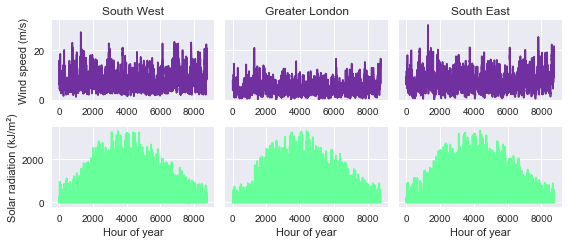

In [3]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3, sharey='row',figsize=size32)
for j in [0,1,2]:
    axx = ax[0][j]
    x = df['t']
    y = df[wind_column[j]]
    axx.plot(x, y,label=label[j],color=wind_color)
    if j == 0:
        axx.set_ylabel(wind_label)
    axx.set_ylim(0,32)
    axx.title.set_text(label[j])
for j in [0,1,2]:
    axx = ax[1][j]
    x = df['t']
    y = df[solar_column[j]]
    axx.plot(x,y,label=label[j],color=solar_color)
    if j == 0:
        axx.set_ylabel(solar_label)
    axx.set_xlabel('Hour of year')
#fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 
plt.tight_layout()
plt.savefig("raw_data_hourly_wind_speed_solar_irradiation.png")

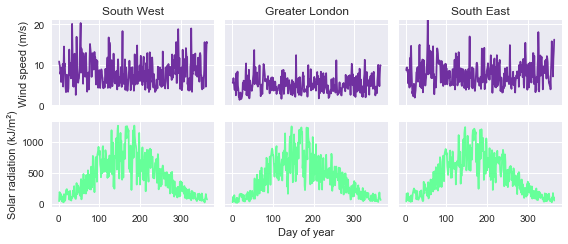

In [4]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3, figsize=size32, sharey='row', sharex=True)
for i in [0,1,2]:
    axx = ax[0][i]
    y = df[wind_column[i]].groupby(df.index.dayofyear).mean()
    axx.plot(y,label=label[i],color=wind_color)
    if i == 0:
        axx.set_ylabel(wind_label)
    axx.title.set_text(label[i])
    axx.set_ylim(0,21)
for i in [0,1,2]:
    axx = ax[1][i]
    y = df[solar_column[i]].groupby(df.index.dayofyear).mean()
    axx.plot(y,label=label[i],color=solar_color)
    if i == 0:
        axx.set_ylabel(solar_label)
    if i == 1:
        axx.set_xlabel('Day of year')

plt.tight_layout()
plt.savefig("raw_data_daily_wind_speed_solar_demand.png")

# Monthly distributions of raw data: wind, solar

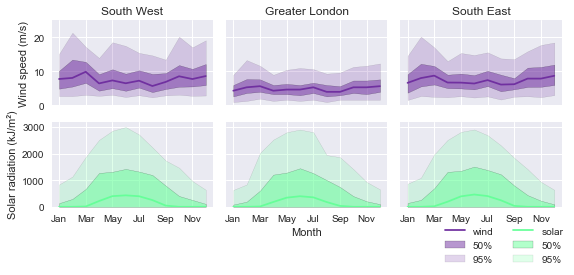

In [5]:

#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(2,3,figsize=size32,sharex=True)

for j in [0,1,2]:
    y_wind = df[wind_column[j]]
    y_solar = df[solar_column[j]]
    params_wind = {'color':wind_color,'legend':"wind",'ylim':(0,25)}
    params_solar = {'color':solar_color,'legend':"solar",'ylim':(0,3200)}
    wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.month, ax[0][j],params_wind)
    sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.month,ax[1][j],params_solar)


for i,j in [(i,j) for i in [0,1] for j in [0,1,2]]:
    ax[i][j].set_xticks(range(1,13,2))
    ax[i][j].set_xticklabels([datetime.strptime(str(month), "%m").strftime('%b') for month in range(1,13,2)])
    if j == 0 and i==0:
        ax[i][j].set_ylabel(wind_label)
    if j>0:
        ax[i][j].set_yticklabels([])
    if j == 0 and i==1:
        ax[i][j].set_ylabel(solar_label)
    if i == 0:
        ax[i][j].title.set_text(label[j])
    if i == 1 and j == 1:
        ax[i][j].set_xlabel('Month')


    
fig.legend(handles=[wind1,wind2,wind3,sol1,sol2,sol3],
                bbox_to_anchor=(1,-0.1), loc="lower right",
                bbox_transform=fig.transFigure, ncol=2)
    
plt.tight_layout()
plt.savefig("monthly_distribution_raw_wind_solar.png", bbox_inches='tight')

# Hourly distributions of raw data: wind, solar

## Annual

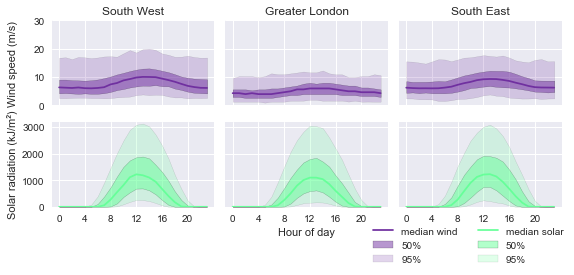

In [6]:

#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(2,3,figsize=size32,sharex=True)

for j in [0,1,2]:
    y_wind = df[wind_column[j]]
    y_solar = df[solar_column[j]]
    params_wind = {'color':wind_color,'legend':"median wind",'ylim':(0,30)}
    params_solar = {'color':solar_color,'legend':"median solar",'ylim':(0,3200)}
    wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.hour, ax[0][j],params_wind)
    sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.hour,ax[1][j],params_solar)


for i,j in [(i,j) for i in [0,1] for j in [0,1,2]]:
    ax[i][j].set_xticks(range(0,24,4))
    #ax[i][j].set_xticklabels([datetime.strptime(str(month), "%m").strftime('%b') for month in range(1,13,2)])
    if j == 0 and i==0:
        ax[i][j].set_ylabel(wind_label+"\n ")
    if j>0:
        ax[i][j].set_yticklabels([])
    if j == 0 and i==1:
        ax[i][j].set_ylabel( solar_label)
    if i == 0:
        ax[i][j].title.set_text(label[j])
    if i == 1 and j == 1:
        ax[i][j].set_xlabel('Hour of day')
    
fig.legend(handles=[wind1,wind2,wind3,sol1,sol2,sol3],
                bbox_to_anchor=(1,-0.1), loc="lower right",
                bbox_transform=fig.transFigure, ncol=2)
    
plt.tight_layout()
plt.savefig("hourly_distribution_raw_wind_solar.png", bbox_inches='tight')

## Hourly distributions for four quarters: solar irradiation

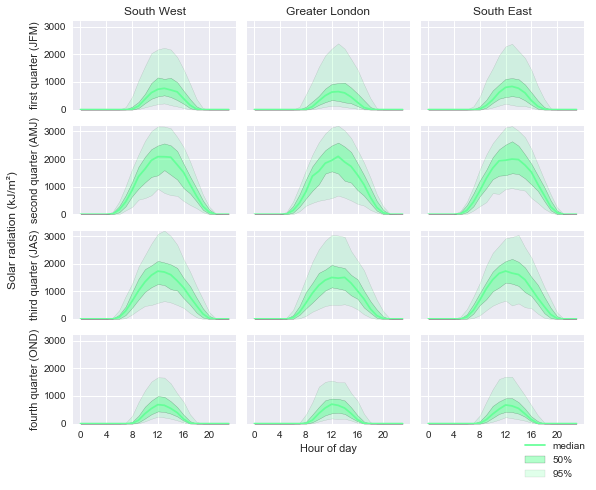

In [6]:
fig,ax =  plt.subplots(4,3,figsize=size34, sharey=True, sharex=True)
#seasons = [winter, spring, summer, autumn]
seasons = [quarter1, quarter2, quarter3, quarter4]


for season in seasons:
    i = season['plot_pos']
    df_season = df[season['period']]
    for j in [0,1,2]:
        y_solar = df_season[solar_column[j]]
        params_solar = {'color':solar_color, 'ylim':(0,3200),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"median", 'pos':(i,j),'imax':3}
        sol1,sol2,sol3 = plot_median_quantiles(y_solar,y_solar.index.hour,ax[i][j],params_solar)
        # plot_median_quantiles(y_demand,y_demand.index.hour,ax[i][j],params_demand)
        # plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[i][j],params_wind_solar)
for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    if i == 3 and j == 1:
        ax[i][j].set_xlabel('Hour of day')
    ax[i][j].set_xticks(range(0,24,4))
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
fig.legend(handles=[sol1,sol2,sol3],
                bbox_to_anchor=(1,-0.05), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=1)
fig.text(-0.02, 0.5, solar_label, fontsize='large', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png", bbox_inches='tight')
#fig.legend(handles, labels, loc='upper right')

## Hourly distributions for four quarters: wind speed

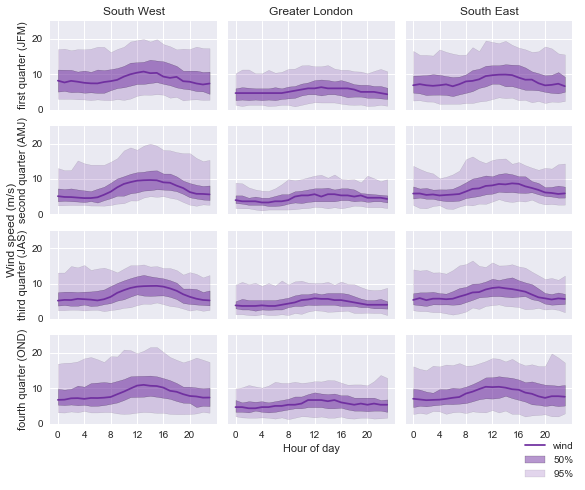

In [7]:
fig,ax =  plt.subplots(4,3,figsize=size34, sharey=True, sharex=True)
#seasons = [summer, winter, autumn, spring]
seasons = [quarter1, quarter2, quarter3, quarter4]


for season in seasons:
    i = season['plot_pos']
    df_season = df[season['period']]
    for j in [0,1,2]:
        y_wind = df_season[wind_column[j]]
        params_solar = {'color':wind_color, 'ylim':(0,25),
                        'xlabel':"Hour", 'ylabel':season['label'],
                        'legend':"wind", 'pos':(i,j),'imax':3}
        wind1,wind2,wind3 = plot_median_quantiles(y_wind,y_wind.index.hour,ax[i][j],params_solar)
        # plot_median_quantiles(y_demand,y_demand.index.hour,ax[i][j],params_demand)
        # plot_median_quantiles(y_wind_solar,y_wind_solar.index.hour,ax[i][j],params_wind_solar)
for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    ax[i][j].set_xticks(range(0,24,4))
    if i == 3 and j == 1:
        ax[i][j].set_xlabel('Hour of day')
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
fig.legend(handles=[wind1,wind2,wind3],
                bbox_to_anchor=(1,-0.05), loc="lower right", 
                bbox_transform=fig.transFigure, ncol=1)
fig.text(0, 0.5, wind_label,fontsize='large', va='center', rotation='vertical')
plt.tight_layout()
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png", bbox_inches='tight')
#fig.legend(handles, labels, loc='upper right')

# Probability distribution

## Empirical Cumulative Distribution Functions (ECDF)
The red line represents the cut-out speed for wind power generation

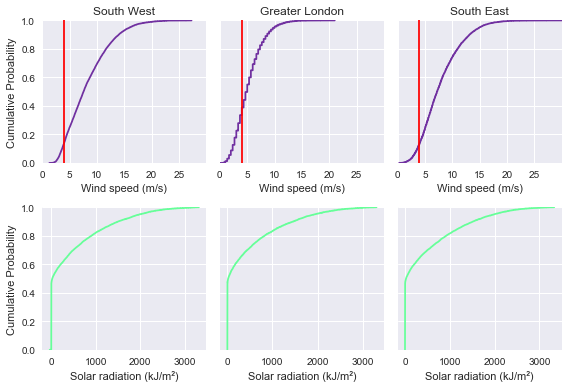

In [8]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3,sharey=True)
for j in [0,1,2]:
    axx = ax[0][j]
    axx.title.set_text(label[j])
    axx.set_xlabel(wind_label)
    axx.set_xlim(0,30)
    axx.set_xticks(range(0,30,5))
    if j == 0:
        axx.set_ylabel("Cumulative Probability")
    sns.ecdfplot(ax=axx, data=df, x=wind_column[j],color=wind_color)
    axx.axvline(4,color='r')
    #sns.histplot(ax = axx,data=df, x=wind_column[j],color=wind_color,cumulative=True, stat="density",)

mpl.style.use('seaborn')
#Plot daily average
for j in [0,1,2]:
    axx = ax[1][j]
    axx.set_xlabel(solar_label)
    if j == 0:
        axx.set_ylabel("Cumulative Probability")
    sns.ecdfplot(ax=axx, data=df, x=solar_column[j],color=solar_color)
    #sns.histplot(ax = axx,data=df, x=solar_column[j],color=solar_color,cumulative=True, stat="density",)

    plt.tight_layout()
plt.savefig("raw_wind_solar_distribution_function.png")

## Frequency distribution of raw data: wind
Each bar represent a range of wind speed [0,1), [1,2), ... [29,30) m/s.
The red bars represents ranges of wind speed < 4m/s, which is the cut-out speed for power generation.

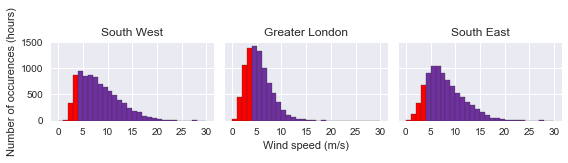

In [7]:
mpl.style.use('seaborn')
fig,ax =  plt.subplots(1,3,figsize=size31)
for i in [0,1,2]:
    axx = ax[i]
    axx.title.set_text(label[i])
    if i>0:
        ax[i].set_yticklabels([])
    n, bins, patches = ax[i].hist(x=df[wind_column[i]],edgecolor="#333333",color=wind_color,bins=range(0,31),align='mid')
    for k in [0,1,2,3]:
        patches[k].set_fc('r')
    if i == 1:
        axx.set_xlabel(wind_label)
    axx.set_ylim(0,1500)
    axx.set_xticks(range(0,31,5))
ax[0].set_ylabel('Number of occurences (hours)')





# mpl.style.use('seaborn')
# #Plot daily average
# for i in [0,1,2]:
#     axx = ax[1][i]
#     if i>0:
#         ax[1][i].set_yticklabels([])
#     sns.histplot(ax=axx, data=df,color=solar_color,x=solar_column[i])
#     axx.set_xlabel(solar_label)
plt.tight_layout()
plt.savefig("raw_wind_distribution_function.png")

## Frequency distribution of raw data: wind
Each bar represent a range of wind speed [0,1), [1,2), ... [29,30) m/s.
The red bars represents ranges of wind speed < 4m/s, which is the cut-out speed for power generation.

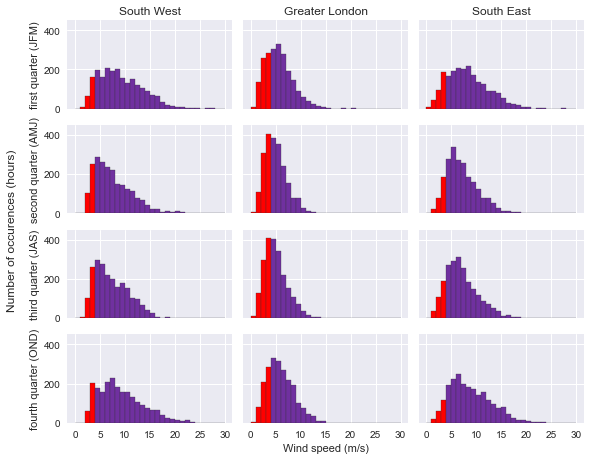

In [10]:
mpl.style.use('seaborn')
fig,ax =  plt.subplots(4,3,figsize=size34,sharex=True,sharey=True)
seasons = [quarter1, quarter2, quarter3, quarter4]
for season in seasons:
    i = season['plot_pos']
    df_season = df[season['period']]
    for j in [0,1,2]:
        axx = ax[i][j]
        #sns.histplot(ax=axx, data=df_season,color=wind_color,x=wind_column[j],binwidth=1)
        n, bins, patches = axx.hist(x=df_season[wind_column[j]],edgecolor="#333333",color=wind_color,bins=range(0,31),align='mid')
        for k in [0,1,2,3]:
            patches[k].set_fc('r')
for i,j in [(i,j) for i in [0,1,2,3] for j in [0,1,2]]:
    if i == 3 and j == 1:
        ax[i][j].set_xlabel(wind_label)
        ax[i][j].set_xticks(range(0,31,5))
    if j==0:
        ax[i][j].set_ylabel(seasons[i]['label'])
    if i == 0:
        ax[i][j].title.set_text(label[j])
    #ax[i][j].set_xlim(0,30)
    ax[i][j].set_ylim(0,450)
plt.tight_layout()
fig.text(-0.02, 0.5, "Number of occurences (hours)", fontsize="large", va='center', rotation='vertical')
plt.savefig("per_season_hourly_distribution_wind_solar_demand.png", bbox_inches='tight')